# import libraries

In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')

seed = 42
rng = RandomState(seed)

df = pd.read_csv('Model.csv')

X, y = df.iloc[:, 1:-1], df.iloc[:, -1]
print(X.shape, y.shape)

(12529, 59) (12529,)


In [2]:
df.head()

,Unnamed: 0,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,...,income,education,age,time,expiration,driving_distance,gender,has_children,direction_opp,Y
0,0,0,1,0,1,0,0,0,0,0,...,3,2,1,1,1,0,0,1,1,1
1,1,0,1,0,0,1,0,0,0,0,...,3,2,1,0,0,0,0,1,1,0
2,2,0,1,0,0,1,0,0,0,0,...,3,2,1,0,0,1,0,1,1,1
3,3,0,1,0,0,1,0,0,0,0,...,3,2,1,1,0,1,0,1,1,0
4,4,0,1,0,0,1,0,0,0,0,...,3,2,1,1,1,1,0,1,1,0


# train-test split

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (10023, 59) (10023,)
Test set:  (2506, 59) (2506,)


In [4]:
#Base logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear',random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [5]:
lr.score(X_train, y_train)

0.6859223785293824

In [6]:
lr.score(X_test,y_test)

0.6743814844373504

# Hyperparameter Tuning

#### Cfloat, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

#### penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
Specify the norm of the penalty:

'none': no penalty is added;

'l2': add a L2 penalty term and it is the default choice;

'l1': add a L1 penalty term;

'elasticnet': both L1 and L2 penalty terms are added

### solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.

In [7]:
c_space = np.linspace(-0.05, 5, 20)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2'],'solver':["liblinear"]}

In [8]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf=clf.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [9]:
best_clf.best_estimator_

LogisticRegression(C=0.48157894736842105, penalty='l1', random_state=0,
                   solver='liblinear')

# Accuracy

In [10]:
print (f'Accuracy - : {best_clf.score(X_train,y_train):.3f}')
print (f'Accuracy - : {best_clf.score(X_test,y_test):.3f}')

Accuracy - : 0.687
Accuracy - : 0.673


# confusion matrix

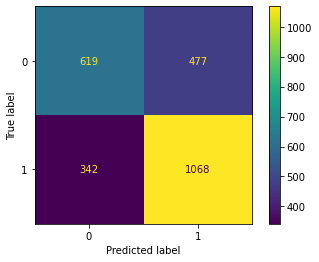

In [11]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_clf, X_test, y_test)
plt.savefig('LogReg_confmat.png')